In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data folder
base = "Elipticpp_data"
if not os.path.isdir(base):
    raise FileNotFoundError(f"Data folder '{base}' not found. Place the extracted files there or update the path.")

# 2. Load core tables
txs_features = pd.read_csv(os.path.join(base, "txs_features.csv"))
txs_classes  = pd.read_csv(os.path.join(base, "txs_classes.csv"))
txs_edges    = pd.read_csv(os.path.join(base, "txs_edgelist.csv"))

wallets_features = pd.read_csv(os.path.join(base, "wallets_features.csv"))
wallets_classes  = pd.read_csv(os.path.join(base, "wallets_classes.csv"))

# 3. Merge labels
txs = txs_features.merge(txs_classes, on="txId", how="left")
wallets = wallets_features.merge(wallets_classes, on="address", how="left")

# === MAP NUMERIC CLASSES TO MEANINGFUL LABELS ===
# Elliptic++: 1 = illicit, 2 = licit, 3 = unknown
class_mapping = {
    1: "Illicit",
    2: "Licit",
    3: "Unknown"
}

txs["class_label"] = txs["class"].map(class_mapping)
wallets["class_label"] = wallets["class"].map(class_mapping)

print("txs:", txs.shape)
print("wallets:", wallets.shape)


txs: (203769, 186)
wallets: (1268260, 59)


Tx class counts:
 class_label
Illicit      4545
Licit       42019
Unknown    157205
Name: count, dtype: int64
Wallet class counts:
 class_label
Illicit     28601
Licit      338871
Unknown    900788
Name: count, dtype: int64


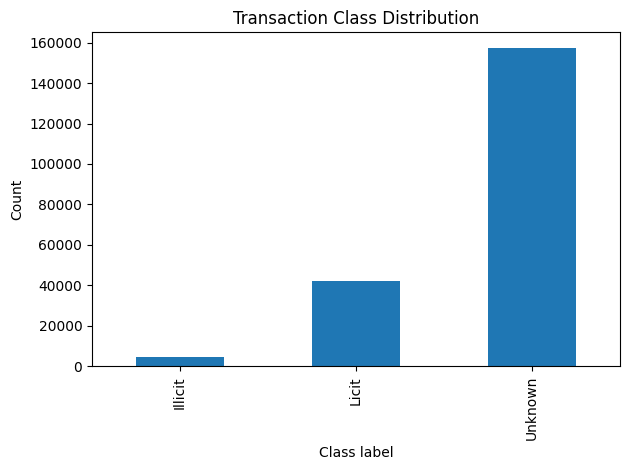

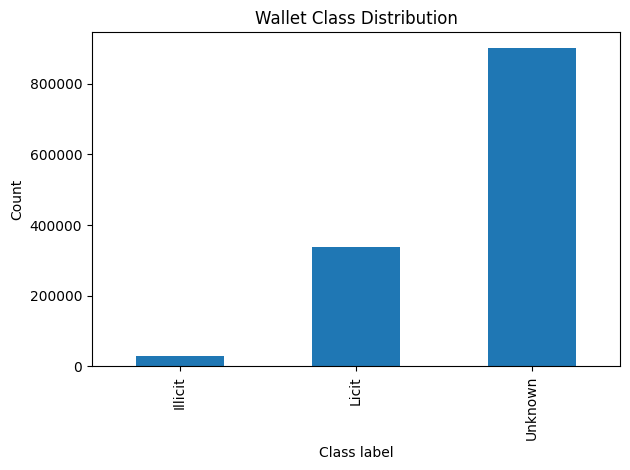

In [3]:
# A. Class distribution (using meaningful labels)
tx_label_counts = txs["class_label"].value_counts().sort_index()
wallet_label_counts = wallets["class_label"].value_counts().sort_index()

print("Tx class counts:\n", tx_label_counts)
print("Wallet class counts:\n", wallet_label_counts)

plt.figure()
tx_label_counts.plot(kind="bar")
plt.title("Transaction Class Distribution")
plt.xlabel("Class label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure()
wallet_label_counts.plot(kind="bar")
plt.title("Wallet Class Distribution")
plt.xlabel("Class label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Time steps: Time step
1    7880
2    4544
3    6621
4    5693
5    6803
Name: count, dtype: int64  ...  Time step
45    5598
46    3519
47    5121
48    2954
49    2454
Name: count, dtype: int64


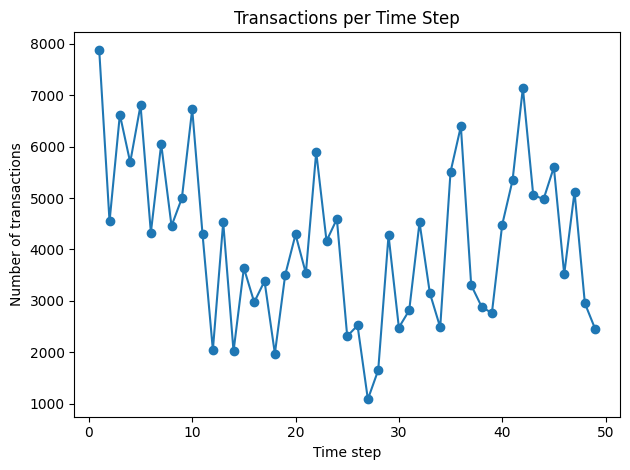

In [4]:
# B. Time-step distribution
timestep_counts = txs["Time step"].value_counts().sort_index()
print("Time steps:", timestep_counts.head(), " ... ", timestep_counts.tail())

plt.figure()
timestep_counts.plot(kind="line", marker="o")
plt.title("Transactions per Time Step")
plt.xlabel("Time step")
plt.ylabel("Number of transactions")
plt.tight_layout()
plt.show()

In [5]:
# C. Missing values
tx_missing = txs.isna().mean().sort_values(ascending=False)
print("Top 20 missing (txs):\n", tx_missing.head(20))

wallet_missing = wallets.isna().mean().sort_values(ascending=False)
print("Top 20 missing (wallets):\n", wallet_missing.head(20))

Top 20 missing (txs):
 in_BTC_mean             0.004736
in_BTC_median           0.004736
in_BTC_total            0.004736
out_BTC_min             0.004736
out_BTC_max             0.004736
out_BTC_mean            0.004736
out_BTC_median          0.004736
out_txs_degree          0.004736
in_txs_degree           0.004736
fees                    0.004736
total_BTC               0.004736
size                    0.004736
num_input_addresses     0.004736
num_output_addresses    0.004736
in_BTC_min              0.004736
in_BTC_max              0.004736
out_BTC_total           0.004736
txId                    0.000000
Local_feature_1         0.000000
Local_feature_2         0.000000
dtype: float64
Top 20 missing (wallets):
 address                      0.0
Time step                    0.0
num_txs_as_sender            0.0
num_txs_as receiver          0.0
first_block_appeared_in      0.0
last_block_appeared_in       0.0
lifetime_in_blocks           0.0
total_txs                    0.0
first_sent_

In [6]:
# D. Basic feature stats for a few numeric columns
num_cols_txs = [c for c in txs.columns if c.startswith("Local_feature_")]
print(txs[num_cols_txs].describe().T)

num_cols_wallets = [c for c in wallets.columns if wallets[c].dtype != "object"]
print(wallets[num_cols_wallets].describe().T)


                     count          mean       std       min       25%  \
Local_feature_1   203769.0  2.231681e-17  1.000002 -0.172983 -0.172532   
Local_feature_2   203769.0  1.785345e-17  1.000002 -0.210553 -0.180327   
Local_feature_3   203769.0  3.570689e-17  1.000002 -1.756361 -1.201369   
Local_feature_4   203769.0  6.792678e-17  1.000002 -0.121970 -0.121970   
Local_feature_5   203769.0  7.531922e-17  1.000002 -0.063725 -0.043875   
...                    ...           ...       ...       ...       ...   
Local_feature_89  203769.0  8.926723e-18  1.000002 -0.761984 -0.752713   
Local_feature_90  203769.0  6.248706e-17  1.000002 -0.694235 -0.692516   
Local_feature_91  203769.0 -8.926723e-18  1.000002 -0.721004 -0.712274   
Local_feature_92  203769.0 -2.231681e-17  1.000002 -1.084907 -1.084907   
Local_feature_93  203769.0  8.759347e-17  1.000002 -1.084845 -1.084845   

                       50%       75%         max  
Local_feature_1  -0.169204 -0.131855   71.681966  
Local_fea

Loaded dataframe: (1268260, 58)
Columns: 58
Numeric feature columns: 56


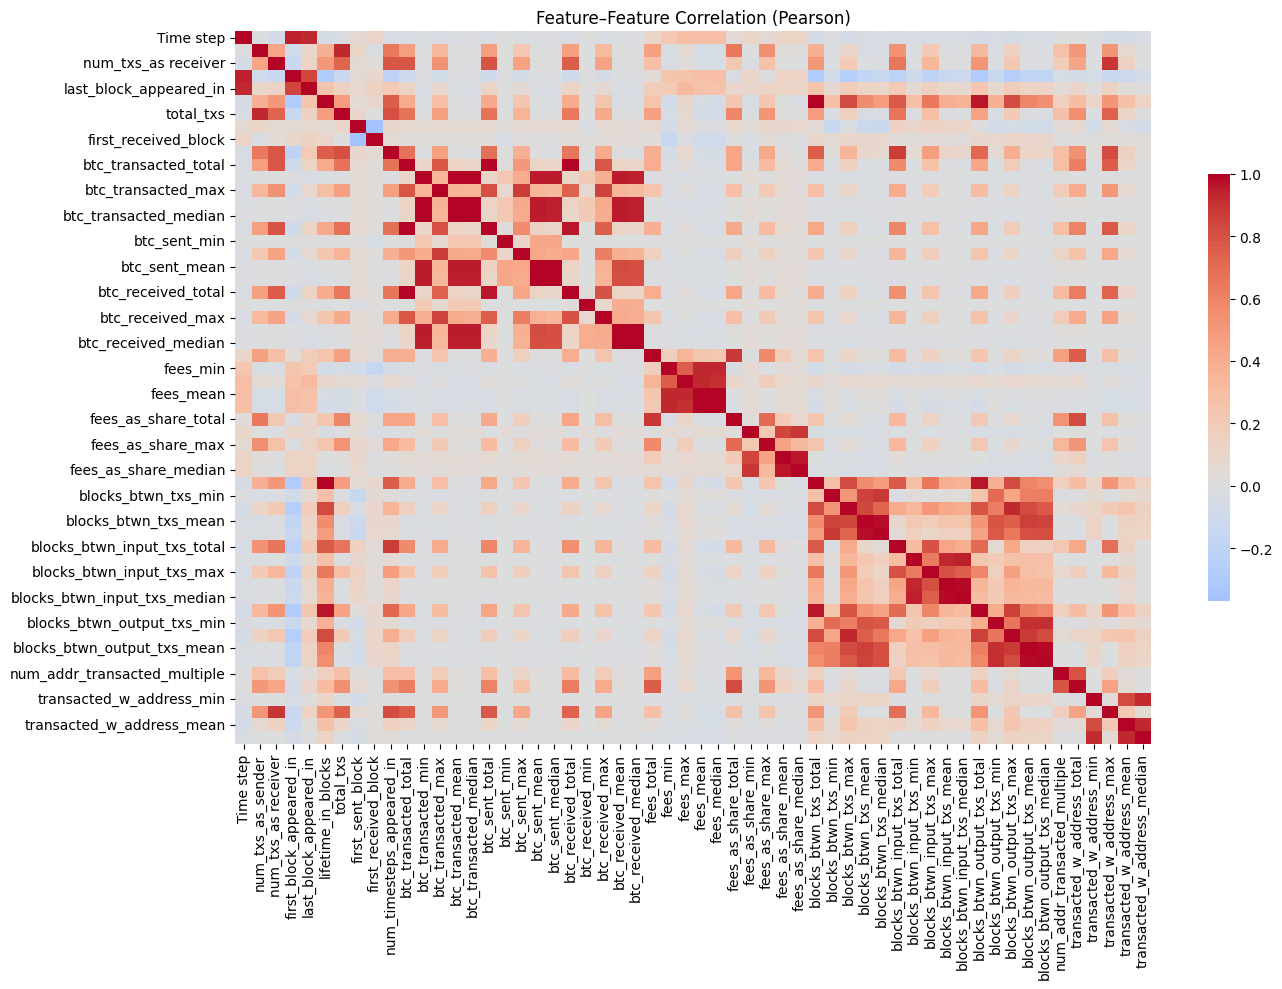


Highly correlated features (|corr| >= 0.8):
Time step                           <-> first_block_appeared_in             : 0.948
Time step                           <-> last_block_appeared_in              : 0.927
num_txs_as_sender                   <-> total_txs                           : 0.936
num_txs_as receiver                 <-> transacted_w_address_max            : 0.889
first_block_appeared_in             <-> last_block_appeared_in              : 0.849
lifetime_in_blocks                  <-> blocks_btwn_txs_total               : 1.000
lifetime_in_blocks                  <-> blocks_btwn_txs_max                 : 0.828
lifetime_in_blocks                  <-> blocks_btwn_output_txs_total        : 0.964
lifetime_in_blocks                  <-> blocks_btwn_output_txs_max          : 0.827
total_txs                           <-> num_timesteps_appeared_in           : 0.804
num_timesteps_appeared_in           <-> blocks_btwn_input_txs_total         : 0.867
num_timesteps_appeared_in      

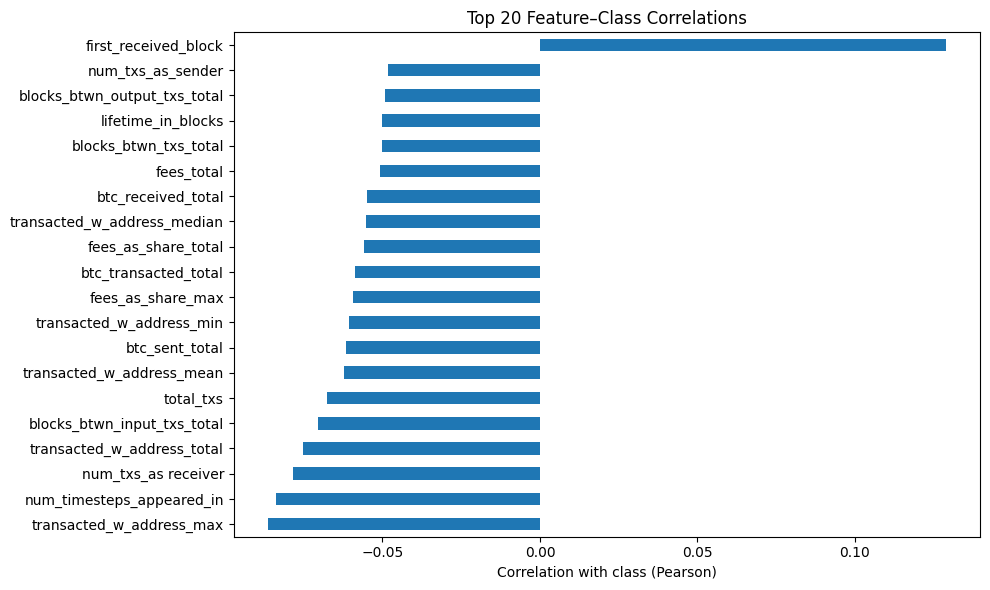

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = os.path.join("Elipticpp_Data", "wallets_features_classes_combined.csv")
df = pd.read_csv(path)

print("Loaded dataframe:", df.shape)
print("Columns:", len(df.columns))

# =======================
# Select numeric features
# =======================
# Exclude address and non-numeric columns automatically
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

if "class" in numeric_cols:
    feature_cols = [c for c in numeric_cols if c != "class"]
else:
    feature_cols = numeric_cols

print(f"Numeric feature columns: {len(feature_cols)}")

# =======================
# 1. Feature–Feature Correlation
# =======================
corr_matrix = df[feature_cols].corr(method="pearson")

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,
            cmap="coolwarm",
            center=0,
            square=False,
            cbar_kws={"shrink": 0.6})
plt.title("Feature–Feature Correlation (Pearson)")
plt.tight_layout()
plt.show()

# Report highly correlated pairs
THRESHOLD = 0.80
print(f"\nHighly correlated features (|corr| >= {THRESHOLD}):")
reported = set()

for i, c1 in enumerate(feature_cols):
    for j, c2 in enumerate(feature_cols):
        if j <= i:
            continue
        corr_val = corr_matrix.loc[c1, c2]
        if abs(corr_val) >= THRESHOLD:
            pair = tuple(sorted([c1, c2]))
            if pair not in reported:
                print(f"{c1:35s} <-> {c2:35s} : {corr_val:.3f}")
                reported.add(pair)

# =======================
# 2. Feature–Label Correlation (class)
# =======================
if "class" in df.columns:
    corr_with_label = (
        df[feature_cols + ["class"]]
        .corr(method="pearson")["class"]
        .drop("class")
        .sort_values(key=lambda s: s.abs(), ascending=False)
    )

    print("\nTop 20 features most correlated with class:")
    print(corr_with_label.head(20))

    # Plot top 20
    plt.figure(figsize=(10, 6))
    corr_with_label.head(20).sort_values().plot(kind="barh")
    plt.xlabel("Correlation with class (Pearson)")
    plt.title("Top 20 Feature–Class Correlations")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'class' not found — skipping feature–label correlation.")
